## Set up

In [1]:
#import StringIO
import quandl
import time
from pytrends.request import TrendReq
quandl.ApiConfig.api_key = 'aJQps1DMV2FYNGxsqoTx'

from vars import google_username, google_password

import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#import datalab.bigquery as bq

import tensorflow as tf
print("done")

done


## Get the data

In [135]:
pytrend = TrendReq(google_username, google_password, custom_useragent='fin-data-local')

def make_gtrend_table(lst_of_words, start_year=2014, num_yrs=1):
    cols = []
    while lst_of_words:
        subset = []
        for _ in range(0, 5):
            if lst_of_words:
                subset.append(lst_of_words.pop())
        rows = []
        for yr in range(start_year, start_year + num_yrs):
            for month in ['1', '4', '7', '10']:
                str_yr = str(yr)
                trend_payload = {'q': ",".join(subset), 'date': month+'/'+str_yr+' 3m'}
                result = pytrend.trend(trend_payload, return_type='dataframe')
                rows.append(result)
                time.sleep(7)
        one_col = pd.concat(rows)
        cols.append(one_col)
    trend_data = pd.concat(cols, axis=1)
    return trend_data


In [153]:
lst_of_words = ["portfolio", "inflation", "revenue", "credit", "profit"]
trend_data = make_gtrend_table(lst_of_words, 2016)

In [154]:
#all_rows = []
all_rows.append(trend_data)

In [155]:
# trend_data_2014 = trend_data
# trend_data_2014.to_csv(path_or_buf="trend_data_2014.csv")

total_trend_data = pd.concat(all_rows)
total_trend_data.to_csv(path_or_buf="2trend_data_2014-16.csv")


In [4]:
snp = quandl.get("YAHOO/INDEX_GSPC", start_date="2014-1-1", end_date="2016-12-31", collapse="daily")
nyse = quandl.get("YAHOO/INDEX_NYA", start_date="2014-1-1", end_date="2016-12-31", collapse="daily")
djia = quandl.get("YAHOO/INDEX_DJI", start_date="2014-1-1", end_date="2016-12-31", collapse="daily")

print(snp)
print("done")

                   Open         High          Low        Close        Volume  \
Date                                                                           
2014-01-02  1845.859985  1845.859985  1827.739990  1831.979980  3.080600e+09   
2014-01-03  1833.209961  1838.239990  1829.130005  1831.369995  2.774270e+09   
2014-01-06  1832.310059  1837.160034  1823.729980  1826.770020  3.294850e+09   
2014-01-07  1828.709961  1840.099976  1828.709961  1837.880005  3.511750e+09   
2014-01-08  1837.900024  1840.020020  1831.400024  1837.489990  3.652140e+09   
2014-01-09  1839.000000  1843.229980  1830.380005  1838.130005  3.581150e+09   
2014-01-10  1840.060059  1843.150024  1832.430054  1842.369995  3.335710e+09   
2014-01-13  1841.260010  1843.449951  1815.520020  1819.199951  3.591350e+09   
2014-01-14  1821.359985  1839.260010  1821.359985  1838.880005  3.353270e+09   
2014-01-15  1840.520020  1850.839966  1840.520020  1848.380005  3.777800e+09   
2014-01-16  1847.989990  1847.989990  18

In [40]:
total_trend_data = pd.DataFrame()
total_trend_data = pd.read_csv("trend_data_2014-16.csv", dtype={ "debt": np.float64, "dow jones industrial": np.float64, "economy": np.float64, "money": np.float64, "s&p 500": np.float64})
total_trend_data['Date'] = total_trend_data['Date'].apply(pd.to_datetime)
total_trend_data = total_trend_data.set_index("Date")
print(total_trend_data)

            debt  dow jones industrial  economy  money  s&p 500
Date                                                           
2014-01-01   5.0                   0.0      6.0   90.0      1.0
2014-01-02   8.0                   1.0      7.0  100.0      1.0
2014-01-03   7.0                   1.0      7.0   94.0      1.0
2014-01-04   5.0                   0.0      7.0   92.0      0.0
2014-01-05   6.0                   0.0      8.0   89.0      0.0
2014-01-06   9.0                   1.0      8.0   94.0      1.0
2014-01-07   9.0                   1.0      9.0   89.0      1.0
2014-01-08   9.0                   1.0      9.0   87.0      1.0
2014-01-09   9.0                   1.0     11.0   87.0      1.0
2014-01-10   8.0                   1.0      9.0   86.0      1.0
2014-01-11   6.0                   0.0      7.0   85.0      0.0
2014-01-12   6.0                   0.0      9.0   86.0      0.0
2014-01-13   8.0                   1.0     10.0   90.0      1.0
2014-01-14   9.0                   1.0  

In [ ]:
# %%sql --module market_data_query
# SELECT * FROM $market_data_table LIMIT 1

In [ ]:
# snp = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.snp')).to_dataframe().set_index('Date')
# nyse = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.nyse')).to_dataframe().set_index('Date')
# djia = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.djia')).to_dataframe().set_index('Date')
# nikkei = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.nikkei')).to_dataframe().set_index('Date')
# hangseng = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.hangseng')).to_dataframe().set_index('Date')
# ftse = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.ftse')).to_dataframe().set_index('Date')
# dax = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.dax')).to_dataframe().set_index('Date')
# aord = bq.Query(market_data_query, market_data_table=bq.Table('bingo-ml-1:market_data.aord')).to_dataframe().set_index('Date')


## Munge the data

In [45]:
closing_data = pd.DataFrame()

closing_data['snp_close'] = snp['Close']
closing_data['nyse_close'] = nyse['Close']
closing_data['djia_close'] = djia['Close']

for k in total_trend_data.keys():
    closing_data[k+'_gtrend'] = total_trend_data[k]

# Pandas includes a very convenient function for filling gaps in the data.
closing_data = closing_data.fillna(method='ffill')
closing_data.describe()



,snp_close,nyse_close,djia_close,debt_gtrend,dow jones industrial_gtrend,economy_gtrend,money_gtrend,s&p 500_gtrend
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,2029.031705,10573.453702,17430.628833,8.051587,1.276455,9.480159,81.056878,1.080688
std,107.248833,425.423927,855.607846,1.778081,0.642038,2.101624,12.551170,0.436843
min,1741.890015,9029.879883,15372.799805,4.000000,0.000000,5.000000,52.000000,0.000000
25%,1951.052490,10340.935059,16714.974609,7.000000,1.000000,8.000000,74.000000,1.000000
50%,2050.875000,10637.580078,17579.195313,8.000000,1.000000,10.000000,86.000000,1.000000
75%,2102.082520,10892.252686,18001.237793,9.000000,1.000000,11.000000,90.000000,1.000000
max,2271.719971,11239.660156,19974.619141,18.000000,7.000000,16.000000,100.000000,7.000000


In [156]:
for k in total_trend_data.keys():
    closing_data[k+'_gtrend'] = total_trend_data[k]


In [159]:
closing_data.describe()
#closing_data.to_csv(path_or_buf="closing_data_2014-16.csv")

,snp_close,nyse_close,djia_close,debt_gtrend,dow jones industrial_gtrend,economy_gtrend,money_gtrend,s&p 500_gtrend,bonds_gtrend,growth_gtrend,hedge_gtrend,investment_gtrend,stocks_gtrend,credit_gtrend,inflation_gtrend,portfolio_gtrend,profit_gtrend,revenue_gtrend
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.00000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,2029.031705,10573.453702,17430.628833,8.051587,1.276455,9.480159,81.056878,1.080688,35.923280,83.48545,17.125661,65.023810,35.242063,89.695767,1.845238,3.031746,4.134921,5.820106
std,107.248833,425.423927,855.607846,1.778081,0.642038,2.101624,12.551170,0.436843,7.535132,11.67092,2.687489,9.681249,6.766366,4.385712,0.386687,0.339922,0.596056,1.026493
min,1741.890015,9029.879883,15372.799805,4.000000,0.000000,5.000000,52.000000,0.000000,17.000000,46.00000,10.000000,30.000000,21.000000,74.000000,1.000000,2.000000,2.000000,2.000000
25%,1951.052490,10340.935059,16714.974609,7.000000,1.000000,8.000000,74.000000,1.000000,30.000000,77.00000,15.000000,61.000000,31.000000,87.000000,2.000000,3.000000,4.000000,5.000000
50%,2050.875000,10637.580078,17579.195313,8.000000,1.000000,10.000000,86.000000,1.000000,36.000000,85.00000,17.000000,68.000000,35.000000,90.000000,2.000000,3.000000,4.000000,6.000000
75%,2102.082520,10892.252686,18001.237793,9.000000,1.000000,11.000000,90.000000,1.000000,41.000000,93.00000,19.000000,72.000000,39.000000,92.000000,2.000000,3.000000,5.000000,6.000000
max,2271.719971,11239.660156,19974.619141,18.000000,7.000000,16.000000,100.000000,7.000000,88.000000,100.00000,27.000000,82.000000,100.000000,100.000000,3.000000,4.000000,5.000000,12.000000


In [160]:
#will the google trends data predict whether next day will be higher than last 21 day avg
def make_log_avg_return(closing_data, delta_days=21):
    log_avg_return_data = pd.DataFrame()
    for k in closing_data:
        orig_col = closing_data[k]
        test_col = closing_data[k].copy()
        for i in range(delta_days, test_col.size):
            avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
            test_col[i] = np.log(orig_col[i] / avg)
        if "gtrend" in k:
            log_avg_return_data[k] = test_col[delta_days:].shift()
        else:
            log_avg_return_data[k] = test_col[delta_days:]
    return log_avg_return_data
log_avg_return_data = make_log_avg_return(closing_data)
print (log_avg_return_data)
log_avg_return_data.corr().iloc[:,0]
    

/Users/cheng/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


            snp_close  nyse_close  djia_close  debt_gtrend  \
Date                                                         
2014-02-03  -0.045160   -0.049553   -0.055107          NaN   
2014-02-04  -0.035191   -0.039320   -0.047268     0.016000   
2014-02-05  -0.035224   -0.037889   -0.044575     0.211309   
2014-02-06  -0.020887   -0.022446   -0.029544     0.094834   
2014-02-07  -0.005977   -0.009117   -0.016333     0.089612   
2014-02-10  -0.003342   -0.008361   -0.013860    -0.020943   
2014-02-11   0.008669    0.004800    0.000191    -0.020943   
2014-02-12   0.008997    0.006079   -0.000420     0.084417   
2014-02-13   0.014789    0.011840    0.004436     0.256430   
2014-02-14   0.019826    0.017640    0.013350     0.149113   
2014-02-18   0.021241    0.021677    0.012843    -0.179341   
2014-02-19   0.014831    0.015639    0.008115     0.048790   
2014-02-20   0.021107    0.022151    0.015127    -0.061558   
2014-02-21   0.019293    0.021414    0.014114    -0.066521   
2014-02-

snp_close                      1.000000
nyse_close                     0.972135
djia_close                     0.969259
debt_gtrend                   -0.087074
dow jones industrial_gtrend   -0.411246
economy_gtrend                -0.187933
money_gtrend                   0.028317
s&p 500_gtrend                -0.322048
bonds_gtrend                  -0.097372
growth_gtrend                 -0.041826
hedge_gtrend                  -0.146486
investment_gtrend             -0.019798
stocks_gtrend                 -0.220037
credit_gtrend                  0.066729
inflation_gtrend              -0.137077
portfolio_gtrend              -0.081257
profit_gtrend                 -0.058745
revenue_gtrend                -0.095726
Name: snp_close, dtype: float64

In [161]:
#will google trends data predict whether next 21 day avg is higher than last 21 day avg
def make_log_avg_return3(closing_data, delta_days=21):
    log_avg_return_data = pd.DataFrame()
    for k in closing_data:
        if "gtrend" in k:
            orig_col = closing_data[k]
            test_col = closing_data[k].copy()
            for i in range(delta_days, test_col.size-delta_days+1):
                avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
                test_col[i] = np.log(orig_col[i] / avg)
            log_avg_return_data[k] = test_col[delta_days:].shift()
        else:
            orig_col = closing_data[k]
            test_col = closing_data[k].copy()
            for i in range(delta_days, test_col.size-delta_days+1):
                prev_avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
                next_avg = sum(orig_col[i:i+delta_days]) / float(delta_days)
                test_col[i] = np.log(next_avg / prev_avg)
            log_avg_return_data[k] = test_col[delta_days:]
    
    return log_avg_return_data
log_avg_return_data3 = make_log_avg_return3(closing_data)
print (log_avg_return_data3)
log_avg_return_data3.corr().iloc[:,0]
    

/Users/cheng/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


              snp_close    nyse_close    djia_close  debt_gtrend  \
Date                                                               
2014-02-03    -0.000685     -0.003650     -0.015790          NaN   
2014-02-04     0.005116      0.002329     -0.009716     0.016000   
2014-02-05     0.010283      0.007860     -0.003802     0.211309   
2014-02-06     0.015534      0.013272      0.002101     0.094834   
2014-02-07     0.019913      0.017607      0.007104     0.089612   
2014-02-10     0.022801      0.020560      0.010729    -0.020943   
2014-02-11     0.025572      0.023550      0.014223    -0.020943   
2014-02-12     0.026853      0.025080      0.015876     0.084417   
2014-02-13     0.027413      0.025979      0.017051     0.256430   
2014-02-14     0.028397      0.027199      0.018729     0.149113   
2014-02-18     0.029518      0.028413      0.020241    -0.179341   
2014-02-19     0.030167      0.028867      0.021367     0.048790   
2014-02-20     0.031538      0.029959      0.023

snp_close                      1.000000
nyse_close                     0.999994
djia_close                     0.999992
debt_gtrend                    0.949706
dow jones industrial_gtrend    0.485617
economy_gtrend                 0.954822
money_gtrend                   0.974495
s&p 500_gtrend                 0.526237
bonds_gtrend                   0.952664
growth_gtrend                  0.964362
hedge_gtrend                   0.971124
investment_gtrend              0.965908
stocks_gtrend                  0.970200
credit_gtrend                  0.974698
inflation_gtrend               0.755126
portfolio_gtrend               0.933992
profit_gtrend                  0.942328
revenue_gtrend                 0.943083
Name: snp_close, dtype: float64

In [162]:
#will google trends data predict wheter price will be higher than prev day's price
def make_log_avg_return2(closing_data, delta_days=21):
    log_avg_return_data2 = pd.DataFrame()
    for k in closing_data:
        if "gtrend" in k:
            orig_col = closing_data[k]
            test_col = closing_data[k].copy()

            for i in range(delta_days, test_col.size):
                avg = sum(orig_col[i-delta_days:i]) / float(delta_days)
                test_col[i] = np.log(orig_col[i] / avg)
            log_avg_return_data2[k] = test_col[delta_days:].shift()
        else:
            log_avg_return_data2[k] = np.log(closing_data[k][delta_days:]/closing_data[k][delta_days:].shift())
    return log_avg_return_data2
log_avg_return_data2 = make_log_avg_return2(closing_data)
print(log_avg_return_data2)
log_avg_return_data2.corr().iloc[:,0]
    

/Users/cheng/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


            snp_close  nyse_close  djia_close  debt_gtrend  \
Date                                                         
2014-02-03        NaN         NaN         NaN          NaN   
2014-02-04   0.007612    0.007709    0.004701     0.016000   
2014-02-05  -0.002030   -0.000809   -0.000324     0.211309   
2014-02-06   0.012363    0.013286    0.012122     0.094834   
2014-02-07   0.013214    0.011515    0.010537     0.089612   
2014-02-10   0.001568   -0.000491    0.000488    -0.020943   
2014-02-11   0.011001    0.011866    0.012139    -0.020943   
2014-02-12  -0.000269    0.000334   -0.001929     0.084417   
2014-02-13   0.005793    0.005373    0.003979     0.256430   
2014-02-14   0.004798    0.005261    0.007880     0.149113   
2014-02-18   0.001158    0.003552   -0.001486    -0.179341   
2014-02-19  -0.006546   -0.006307   -0.005585     0.048790   
2014-02-20   0.006013    0.006091    0.005761    -0.061558   
2014-02-21  -0.001921   -0.000969   -0.001857    -0.066521   
2014-02-

snp_close                      1.000000
nyse_close                     0.975477
djia_close                     0.974552
debt_gtrend                    0.040782
dow jones industrial_gtrend   -0.004977
economy_gtrend                 0.001861
money_gtrend                   0.032471
s&p 500_gtrend                -0.013643
bonds_gtrend                   0.019352
growth_gtrend                  0.026584
hedge_gtrend                  -0.021684
investment_gtrend              0.036519
stocks_gtrend                 -0.010795
credit_gtrend                  0.045104
inflation_gtrend              -0.010839
portfolio_gtrend               0.037121
profit_gtrend                 -0.000160
revenue_gtrend                 0.067236
Name: snp_close, dtype: float64

In [178]:
#will google trends data predict wheter price will be higher than prev day's price
def make_log_avg_return0(closing_data, delta_days=21):
    log_avg_return_data2 = pd.DataFrame()
    for k in closing_data:
        if k == "snp_close":
            log_avg_return_data2[k] = np.log(closing_data[k]/closing_data[k].shift())
        else:
            log_avg_return_data2[k] = np.log(closing_data[k]/closing_data[k].shift()).shift()
    return log_avg_return_data2
log_avg_return_data0 = make_log_avg_return0(closing_data)
print(log_avg_return_data0)
log_avg_return_data0.corr().iloc[:,0]
    

            snp_close  nyse_close  djia_close  debt_gtrend  \
Date                                                         
2014-01-02        NaN         NaN         NaN          NaN   
2014-01-03  -0.000333         NaN         NaN          NaN   
2014-01-06  -0.002515    0.001297    0.001740    -0.133531   
2014-01-07   0.006063   -0.002598   -0.002729     0.251314   
2014-01-08  -0.000212    0.005562    0.006423     0.000000   
2014-01-09   0.000348   -0.000622   -0.004134     0.000000   
2014-01-10   0.002304    0.000468   -0.001093     0.000000   
2014-01-13  -0.012656    0.004386   -0.000469    -0.117783   
2014-01-14   0.010760   -0.011148   -0.010957     0.000000   
2014-01-15   0.005153    0.008440    0.007105     0.117783   
2014-01-16  -0.001348    0.004082    0.006579     0.000000   
2014-01-17  -0.003903   -0.000882   -0.003947     0.000000   
2014-01-21   0.002770   -0.003163    0.002528    -0.117783   
2014-01-22   0.000575    0.002178   -0.002684     0.117783   
2014-01-

/Users/cheng/miniconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


snp_close                      1.000000
nyse_close                    -0.003665
djia_close                    -0.010072
debt_gtrend                    0.043945
dow jones industrial_gtrend   -0.107475
economy_gtrend                -0.075123
money_gtrend                  -0.020355
s&p 500_gtrend                -0.092184
bonds_gtrend                   0.006734
growth_gtrend                  0.013555
hedge_gtrend                  -0.057007
investment_gtrend              0.008250
stocks_gtrend                 -0.094553
credit_gtrend                  0.030291
inflation_gtrend              -0.052215
portfolio_gtrend               0.017264
profit_gtrend                  0.022551
revenue_gtrend                 0.043540
Name: snp_close, dtype: float64

## Exploratory data analysis

In [ ]:
# N.B. A super-useful trick-ette is to assign the return value of plot to _ 
# so that you don't get text printed before the plot itself.

_ = pd.concat([closing_data[k] for k in closing_data.keys()], axis=1).plot(figsize=(5, 3))

In [ ]:
scaled_closing_data = pd.DataFrame()
for k in closing_data.keys():
    if "gtrend" in k:
        scaled_closing_data[k] = closing_data[k] / 100.0
    else:
        scaled_closing_data[k] = closing_data[k] / max(closing_data[k])

In [ ]:
_ = pd.concat([scaled_closing_data[k] for k in scaled_closing_data.keys()], axis=1).plot(figsize=(5, 3))

In [ ]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(3)

for k in scaled_closing_data.keys():
    _ = autocorrelation_plot(scaled_closing_data[k], label=k)


_ = plt.legend(loc='upper right')

In [ ]:
_ = scatter_matrix(pd.concat([scaled_closing_data[k] for k in scaled_closing_data.keys()], axis=1), figsize=(5, 5), diagonal='kde')

In [ ]:
_ = pd.concat([log_return_data[k] for k in log_return_data.keys()], axis=1).plot(figsize=(5, 3))

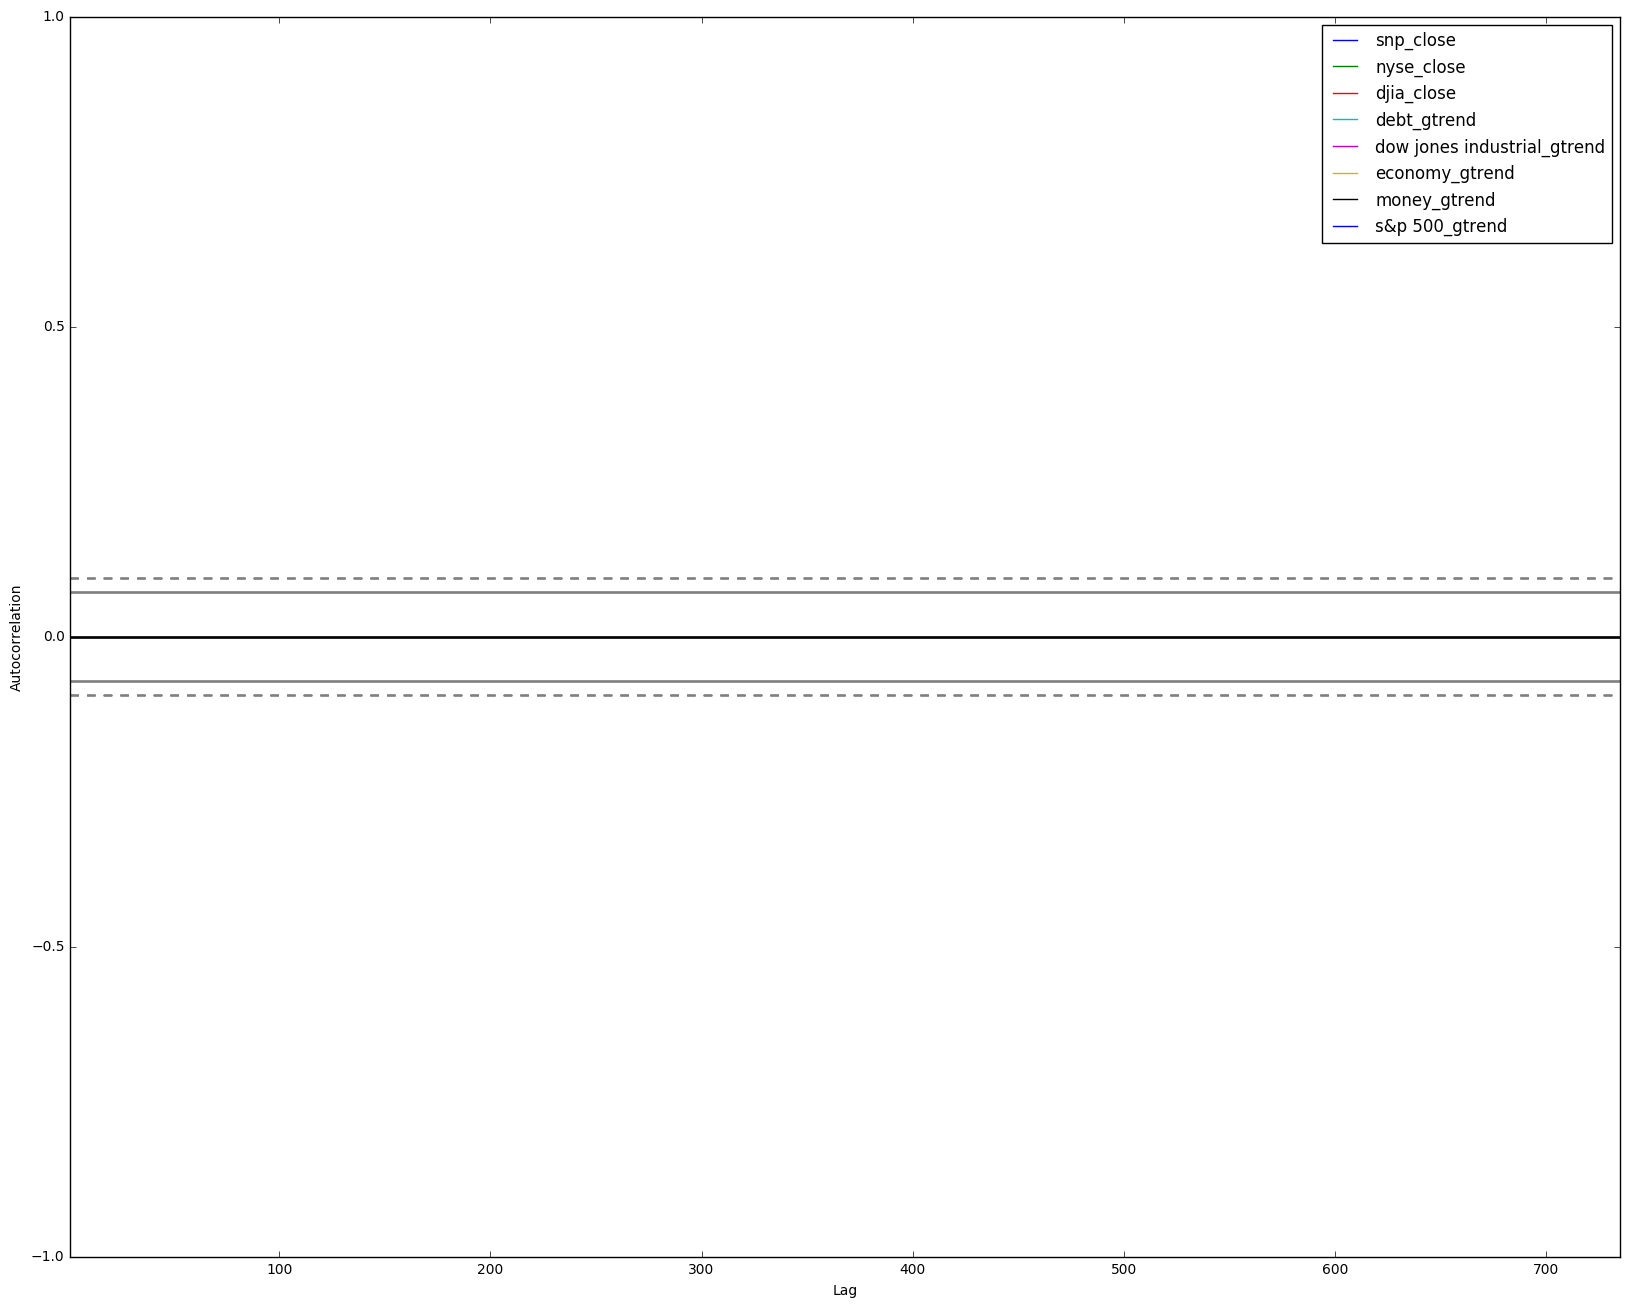

In [111]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(16)

for k in log_avg_return_data2.keys():
    _ = autocorrelation_plot(log_avg_return_data2[k], label=k)

_ = plt.legend(loc='upper right')

In [ ]:
_ = scatter_matrix(log_return_data, figsize=(5, 5), diagonal='kde')

In [57]:
log_avg_return_data.corr().iloc[:,0]

snp_close                      1.000000
nyse_close                     0.972135
djia_close                     0.969259
debt_gtrend                   -0.114444
dow jones industrial_gtrend   -0.433709
economy_gtrend                -0.200895
money_gtrend                   0.013389
s&p 500_gtrend                -0.332723
Name: snp_close, dtype: float64

In [ ]:
tmp = pd.DataFrame()
for k in log_return_data:
    if k == "snp_close":
        tmp[k] = log_return_data[k]
    tmp[k] = log_return_data[k].shift()
tmp.corr().iloc[:,0]


## TensorFlow



*  snp_log_return_positive, which is 1 if the log return of the S&P 500 close is positive, and 0 otherwise. 
* snp_log_return_negative, which is 1 if the log return of the S&P 500 close is negative, and 1 otherwise. 


We'll use 80% of our data for training and 20% for testing.

In [187]:
log_return_data = log_avg_return_data3
print(log_return_data)

              snp_close    nyse_close    djia_close  debt_gtrend  \
Date                                                               
2014-02-03    -0.000685     -0.003650     -0.015790          NaN   
2014-02-04     0.005116      0.002329     -0.009716     0.016000   
2014-02-05     0.010283      0.007860     -0.003802     0.211309   
2014-02-06     0.015534      0.013272      0.002101     0.094834   
2014-02-07     0.019913      0.017607      0.007104     0.089612   
2014-02-10     0.022801      0.020560      0.010729    -0.020943   
2014-02-11     0.025572      0.023550      0.014223    -0.020943   
2014-02-12     0.026853      0.025080      0.015876     0.084417   
2014-02-13     0.027413      0.025979      0.017051     0.256430   
2014-02-14     0.028397      0.027199      0.018729     0.149113   
2014-02-18     0.029518      0.028413      0.020241    -0.179341   
2014-02-19     0.030167      0.028867      0.021367     0.048790   
2014-02-20     0.031538      0.029959      0.023

In [188]:
log_return_data['snp_log_return_positive'] = 0
log_return_data.ix[log_return_data['snp_close'] >= 0, 'snp_log_return_positive'] = 1
log_return_data['snp_log_return_negative'] = 0
log_return_data.ix[log_return_data['snp_close'] < 0, 'snp_log_return_negative'] = 1

#log_return_data.drop(log_return_data.index[[0,1]], inplace=True)


training_test_data = log_return_data
log_return_data.describe()

,snp_close,nyse_close,djia_close,debt_gtrend,dow jones industrial_gtrend,economy_gtrend,money_gtrend,s&p 500_gtrend,bonds_gtrend,growth_gtrend,hedge_gtrend,investment_gtrend,stocks_gtrend,credit_gtrend,inflation_gtrend,portfolio_gtrend,profit_gtrend,revenue_gtrend,snp_log_return_positive,snp_log_return_negative
count,735.000000,735.000000,735.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,735.000000,735.000000
mean,61.214133,302.001589,537.106005,0.168624,-inf,0.225738,2.128649,-inf,0.642677,1.569757,0.276686,1.091069,0.739986,2.381771,0.027330,0.069404,0.095971,0.121791,0.614966,0.385034
std,366.238323,1806.988894,3213.833220,1.126512,NaN,1.452629,13.097644,NaN,4.127239,9.783980,1.756637,6.823398,4.641600,14.635111,0.360324,0.481395,0.641984,0.821900,0.486935,0.486935
min,-0.070060,-0.071375,-0.074346,-0.593064,-inf,-0.606136,-0.437857,-inf,-0.617817,-0.395781,-0.426408,-0.554311,-0.464889,-0.175974,-0.716678,-0.451985,-0.693147,-0.906721,0.000000,0.000000
25%,-0.005947,-0.011211,-0.007565,-0.094586,-0.174353,-0.083035,-0.031379,-0.046520,-0.101217,-0.056785,-0.060529,-0.053697,-0.074882,-0.027695,-0.023530,-0.046520,-0.080043,-0.090972,0.000000,0.000000
50%,0.006092,0.005717,0.005804,-0.005277,0.000000,0.014044,-0.002837,0.000000,-0.021785,0.009358,-0.002884,0.008966,-0.020572,-0.004204,0.000000,0.000000,0.024098,0.003413,1.000000,0.000000
75%,0.023974,0.021079,0.021346,0.088455,0.000000,0.092982,0.030148,0.000000,0.076442,0.054053,0.054885,0.048790,0.041127,0.031033,0.024098,0.016000,0.097466,0.074108,1.000000,1.000000
max,2271.719971,11237.160156,19974.619141,9.000000,2.000000,11.000000,87.000000,1.945910,35.000000,74.000000,13.000000,51.000000,35.000000,100.000000,2.000000,4.000000,5.000000,6.000000,1.000000,1.000000


Now, create the training and test data.

In [189]:
predictors_tf = training_test_data[training_test_data.columns[3:-2]]

classes_tf = training_test_data[training_test_data.columns[-2:]]

training_set_size = int(len(training_test_data) * 0.8)
test_set_size = len(training_test_data) - training_set_size

training_predictors_tf = predictors_tf[:training_set_size]
training_classes_tf = classes_tf[:training_set_size]
test_predictors_tf = predictors_tf[training_set_size:]
test_classes_tf = classes_tf[training_set_size:]

training_predictors_tf.describe()

,debt_gtrend,dow jones industrial_gtrend,economy_gtrend,money_gtrend,s&p 500_gtrend,bonds_gtrend,growth_gtrend,hedge_gtrend,investment_gtrend,stocks_gtrend,credit_gtrend,inflation_gtrend,portfolio_gtrend,profit_gtrend,revenue_gtrend
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,-0.018856,-inf,-0.015402,-0.010870,-inf,-0.012797,-0.002714,0.000413,-0.005160,-0.010946,-0.000800,-0.015638,-0.005584,-0.006746,-0.007745
std,0.168723,NaN,0.149605,0.099861,NaN,0.156736,0.098630,0.093498,0.099979,0.108727,0.046490,0.207039,0.110606,0.135784,0.140859
min,-0.593064,-inf,-0.606136,-0.437857,-inf,-0.617817,-0.395781,-0.327687,-0.554311,-0.352500,-0.169542,-0.716678,-0.451985,-0.693147,-0.906721
25%,-0.112478,-0.174353,-0.097164,-0.033503,-0.046520,-0.101217,-0.054635,-0.054288,-0.052174,-0.071721,-0.028227,-0.023530,-0.046520,-0.080043,-0.090972
50%,-0.006780,0.000000,0.007968,-0.004044,0.000000,-0.027399,0.008830,0.000000,0.008883,-0.022902,-0.004648,0.000000,0.000000,0.000000,-0.006780
75%,0.078084,0.020049,0.078391,0.024628,0.000000,0.064911,0.049393,0.053098,0.046765,0.032261,0.028609,0.000000,0.016000,0.089612,0.074108
max,0.625865,1.732336,0.423484,0.481883,1.339774,0.895142,0.346523,0.556534,0.399075,0.919271,0.165886,0.616774,0.423484,0.349895,0.492476


In [122]:
test_predictors_tf.describe()

,debt_gtrend,dow jones industrial_gtrend,economy_gtrend,money_gtrend,s&p 500_gtrend
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.003836,-0.031938,0.011056,0.022387,-0.041732
std,0.166718,0.285400,0.160667,0.110881,0.288984
min,-0.408635,-0.451985,-0.486728,-0.139072,-0.389465
25%,-0.077288,-0.213574,-0.068993,-0.029953,-0.174353
50%,-0.010526,-0.046520,0.007968,-0.007172,-0.046520
75%,0.074108,0.000000,0.107789,0.031357,0.000000
max,0.479573,1.609438,0.654926,0.562955,1.945910


In [190]:
def tf_confusion_metrics(model, actual_classes, session, feed_dict):
  predictions = tf.argmax(model, 1)
  actuals = tf.argmax(actual_classes, 1)

  ones_like_actuals = tf.ones_like(actuals)
  zeros_like_actuals = tf.zeros_like(actuals)
  ones_like_predictions = tf.ones_like(predictions)
  zeros_like_predictions = tf.zeros_like(predictions)

  tp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  tn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  fp_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, zeros_like_actuals), 
        tf.equal(predictions, ones_like_predictions)
      ), 
      "float"
    )
  )

  fn_op = tf.reduce_sum(
    tf.cast(
      tf.logical_and(
        tf.equal(actuals, ones_like_actuals), 
        tf.equal(predictions, zeros_like_predictions)
      ), 
      "float"
    )
  )

  tp, tn, fp, fn = \
    session.run(
      [tp_op, tn_op, fp_op, fn_op], 
      feed_dict
    )

  tpr = float(tp)/(float(tp) + float(fn))
  fpr = float(fp)/(float(tp) + float(fn))

  accuracy = (float(tp) + float(tn))/(float(tp) + float(fp) + float(fn) + float(tn))

  recall = tpr
  precision = float(tp)/(float(tp) + float(fp))
  
  f1_score = (2 * (precision * recall)) / (precision + recall)
  
  print ('Precision = ', precision)
  print ('Recall = ', recall)
  print ('F1 Score = ', f1_score)
  print ('Accuracy = ', accuracy)

### Binary classification with TensorFlow

In [191]:
sess = tf.Session()

# Define variables for the number of predictors and number of classes to remove magic numbers from our code.
num_predictors = len(training_predictors_tf.columns) # 24 in the default case
num_classes = len(training_classes_tf.columns) # 2 in the default case

# Define placeholders for the data we feed into the process - feature data and actual classes.
feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, num_classes])

# Define a matrix of weights and initialize it with some small random values.
weights = tf.Variable(tf.truncated_normal([num_predictors, num_classes], stddev=0.0001))
biases = tf.Variable(tf.ones([num_classes]))

# Define our model...
# Here we take a softmax regression of the product of our feature data and weights.
model = tf.nn.softmax(tf.matmul(feature_data, weights) + biases)

# Define a cost function (we're using the cross entropy).
cost = -tf.reduce_sum(actual_classes*tf.log(model))

# Define a training step...
# Here we use gradient descent with a learning rate of 0.01 using the cost function we just defined.
training_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.initialize_all_variables()
sess.run(init)

In [192]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

for i in range(1, 30001):
  sess.run(
    training_step, 
    feed_dict={
      feature_data: training_predictors_tf.values, 
      actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
  )
  if i%5000 == 0:
    print (i, sess.run(
      accuracy,
      feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
      }
    ))

5000 0.603741
10000 0.603741
15000 0.603741
20000 0.603741
25000 0.603741


KeyboardInterrupt: 

In [193]:
feed_dict= {
  feature_data: test_predictors_tf.values,
  actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_confusion_metrics(model, actual_classes, sess, feed_dict)

ZeroDivisionError: float division by zero

### Feed-forward neural network with two hidden layers

In [194]:
sess1 = tf.Session()

num_predictors = len(training_predictors_tf.columns)
num_classes = len(training_classes_tf.columns)

feature_data = tf.placeholder("float", [None, num_predictors])
actual_classes = tf.placeholder("float", [None, 2])

weights1 = tf.Variable(tf.truncated_normal([15, 50], stddev=0.0001))
biases1 = tf.Variable(tf.ones([50]))

weights2 = tf.Variable(tf.truncated_normal([50, 25], stddev=0.0001))
biases2 = tf.Variable(tf.ones([25]))
                     
weights3 = tf.Variable(tf.truncated_normal([25, 2], stddev=0.0001))
biases3 = tf.Variable(tf.ones([2]))

hidden_layer_1 = tf.nn.relu(tf.matmul(feature_data, weights1) + biases1)
hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1, weights2) + biases2)
model = tf.nn.softmax(tf.matmul(hidden_layer_2, weights3) + biases3)

cost = -tf.reduce_sum(actual_classes*tf.log(model))

train_op1 = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

init = tf.initialize_all_variables()
sess1.run(init)

In [195]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(actual_classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

for i in range(1, 30001):
  sess1.run(
    train_op1, 
    feed_dict={
      feature_data: training_predictors_tf.values, 
      actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
    }
  )
  if i%5000 == 0:
    print (i, sess1.run(
      accuracy,
      feed_dict={
        feature_data: training_predictors_tf.values, 
        actual_classes: training_classes_tf.values.reshape(len(training_classes_tf.values), 2)
      }
    ))

5000 0.603741
10000 0.603741


KeyboardInterrupt: 

In [ ]:
feed_dict= {
  feature_data: test_predictors_tf.values,
  actual_classes: test_classes_tf.values.reshape(len(test_classes_tf.values), 2)
}

tf_confusion_metrics(model, actual_classes, sess1, feed_dict)